In [1]:
import pandas

In [2]:
stock_info=pandas.read_csv('Stock_Dataset.csv')

In [3]:
stock_info

,Return_On_Equity,Current_Ratio,Asster_Turnover,WACC,Dividend_Yield,Earnings_Yield,Revenue_Change,Net_Income_Change,Price_Change
0,0.212147,2.611354,0.634860,0.082314,0.006483,0.030353,0.997810,0.988836,-0.012635
1,0.236381,2.030091,0.650209,0.079688,0.005628,0.028202,1.083716,1.036364,-0.015849
2,-0.153140,1.453795,0.745390,0.144074,0.011897,-0.107353,0.847402,5.292683,-0.026000
3,-0.024232,1.747670,0.843792,0.131412,0.008853,-0.015133,1.024605,-0.286713,0.001992
4,-0.334683,0.223087,0.435904,0.078395,NaN,-1.310345,1.022805,1.423283,0.032787
...,...,...,...,...,...,...,...,...,...
8108,-0.582772,1.497216,0.785805,0.111011,0.000000,-0.125786,1.135283,1.358748,-0.014501
8109,0.252235,5.696272,0.635835,0.094126,0.000000,0.183831,15.460345,-0.586949,-0.051572
8110,-0.850454,4.011245,0.068563,0.088064,0.000000,-0.522901,0.684963,1.173307,0.029715
8111,0.256909,3.298824,1.358053,0.052428,0.008625,0.040404,1.213859,0.996784,-0.020466


Since each of the columns are made of quantitative data, there is not need for one hot encoding. Since the majority of columns have less than 5% missing data as well, it is also better to simply impute the datas with means to begin. In this case, any and all cleaning consisted in a simple mean imputation accross the columns to fill in the individual missing data.

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from seaborn import scatterplot

In [5]:
y=stock_info.iloc[:,-1:]
x=stock_info.iloc[:,:-1]

In [6]:
x

,Return_On_Equity,Current_Ratio,Asster_Turnover,WACC,Dividend_Yield,Earnings_Yield,Revenue_Change,Net_Income_Change
0,0.212147,2.611354,0.634860,0.082314,0.006483,0.030353,0.997810,0.988836
1,0.236381,2.030091,0.650209,0.079688,0.005628,0.028202,1.083716,1.036364
2,-0.153140,1.453795,0.745390,0.144074,0.011897,-0.107353,0.847402,5.292683
3,-0.024232,1.747670,0.843792,0.131412,0.008853,-0.015133,1.024605,-0.286713
4,-0.334683,0.223087,0.435904,0.078395,NaN,-1.310345,1.022805,1.423283
...,...,...,...,...,...,...,...,...
8108,-0.582772,1.497216,0.785805,0.111011,0.000000,-0.125786,1.135283,1.358748
8109,0.252235,5.696272,0.635835,0.094126,0.000000,0.183831,15.460345,-0.586949
8110,-0.850454,4.011245,0.068563,0.088064,0.000000,-0.522901,0.684963,1.173307
8111,0.256909,3.298824,1.358053,0.052428,0.008625,0.040404,1.213859,0.996784


In [7]:
y

,Price_Change
0,-0.012635
1,-0.015849
2,-0.026000
3,0.001992
4,0.032787
...,...
8108,-0.014501
8109,-0.051572
8110,0.029715
8111,-0.020466


In [8]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=432,test_size=0.15,shuffle=True)

In [9]:
len(x_test)

1217

In [10]:
x_test,x_val,y_test,y_val=train_test_split(x_test,y_test,random_state=145,test_size=0.2,shuffle=True)

In [11]:
print(len(x_train),len(x_test),len(x_val))

6896 973 244


In [12]:
x_train=x_train.apply(lambda col: col.fillna(col.mean()))
x_test=x_test.apply(lambda col: col.fillna(col.mean()))
x_val=x_val.apply(lambda col: col.fillna(col.mean()))
y_train=y_train.apply(lambda col: col.fillna(col.mean()))
y_test=y_test.apply(lambda col: col.fillna(col.mean()))
y_val=y_val.apply(lambda col: col.fillna(col.mean()))

In [13]:
x_train.isnull().astype(int).sum()/len(x_train)

Return_On_Equity     0.0
Current_Ratio        0.0
Asster_Turnover      0.0
WACC                 0.0
Dividend_Yield       0.0
Earnings_Yield       0.0
Revenue_Change       0.0
Net_Income_Change    0.0
dtype: float64

In [14]:
y_train=y_train.pop('Price_Change')
y_test=y_test.pop('Price_Change')
y_val=y_val.pop('Price_Change')

In [15]:
neighbor=KNeighborsRegressor(n_neighbors=3)

In [16]:
neighbor.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=3)

In [17]:
y_predict=neighbor.predict(x_test.values)

C:\Users\essch\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


In [18]:
y_test

1777    0.000000
3847   -0.013915
7645   -0.004283
3170   -0.004069
1675    0.000000
          ...   
4865   -0.004624
7918    0.017021
6191   -0.012069
467     0.030452
6644    0.029525
Name: Price_Change, Length: 973, dtype: float64

<Axes: xlabel='Price_Change'>

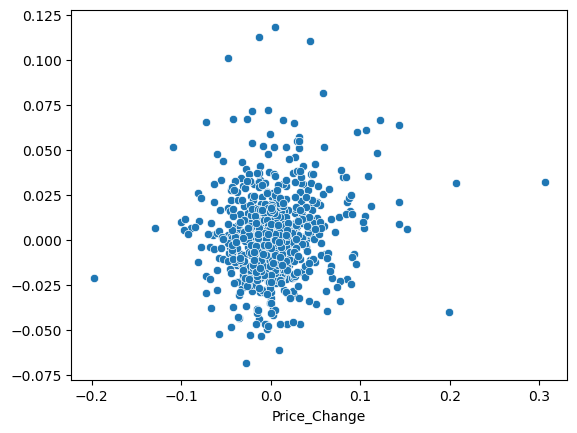

In [19]:
scatterplot(x=y_test,y=y_predict)

In [20]:
error=(mean_squared_error(y_test,y_predict)**.5)
error

0.03830840756519472

Sensitivity analysis of Kneighbors

In [21]:
errors=[]
for k in list(range(0,100)):
    neighbor=KNeighborsRegressor(n_neighbors=k+1)
    neighbor.fit(x_train,y_train)
    y_predict=neighbor.predict(x_test.values)
    error=(mean_squared_error(y_test,y_predict)**.5)*100
    errors.append(error)

C:\Users\essch\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
C:\Users\essch\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
C:\Users\essch\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
C:\Users\essch\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
C:\Users\essch\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
C:\Users\essch\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning

C:\Users\essch\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
C:\Users\essch\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
C:\Users\essch\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
C:\Users\essch\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
C:\Users\essch\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
C:\Users\essch\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning

C:\Users\essch\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
C:\Users\essch\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
C:\Users\essch\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
C:\Users\essch\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
C:\Users\essch\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
C:\Users\essch\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning

In [22]:
min_k_error=errors.index(min(errors))+1
min_error=errors[min_k_error-1]
print("A neighbor count of "+str(min_k_error)+" yields the lowest stanadrd error of "+str(min_error)+"%.")

A neighbor count of 48 yields the lowest stanadrd error of 3.402661613703349%.


In [23]:
print((-1.96*min_error),(1.96*min_error))

-6.669216762858564 6.669216762858564


A further sensitivity analysis can be utilized with the splits between training and test data, but it appears that the model's standard error won't stray far from 3.5%, leading to a 95% confidence interval range of 12%. In terms of grading the model, it is extremely inacurate seeing how the goal is to reduce error to less than 3%. However, it gives a baseline for future models. The reason for this could be a problem with the fundemental assumptions in the data. I do not believe that all of the ratios are normally distributed. The dividend ratio seems to follow a pareto distribution and net income differential seems to follow a heavily right skewed distribution. K Nearest Neighbor should be able to account for these issues, but there are also some points which are imputed to disrupt the distribution. K nearest neighbor is incredibly sensitive to fabricated data, and with some columns having even 5-10% of data being imputed, it heavily pulls the standard error of the model away from 0.

Final Evaluation of Model

In [24]:
neighbor=KNeighborsRegressor(n_neighbors=13)
neighbor.fit(x_train,y_train)
y_evaluation=neighbor.predict(x_val.values)
error=(mean_squared_error(y_val,y_evaluation)**.5)*100

C:\Users\essch\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


In [25]:
print(error)

3.6285072862852865


95% confidence interval for error

In [26]:
print((-1.96*error),(1.96*error))

-7.111874281119161 7.111874281119161
